In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

from pathlib import Path

DATA_DIR = Path("../data/")



In [8]:
!pip install networkx

## Numpy

## Dimensionality of data

In [3]:
def read_dataset_file(path: Path) -> np.lib.npyio.NpzFile:
    return np.load(file=path, allow_pickle=True)

metr_la = read_dataset_file(DATA_DIR / "metr_la_new.npz")
metr_la

NpzFile '../data/metr_la_new.npz' with keys: num_timestamps, num_nodes, first_timestamp_datetime, last_timestamp_datetime, timestamp_frequency...

In [4]:
EDGES_KEY = "edges"
TARGETS_KEY = "targets"
SPATIAL_FEATURES_KEY = "spatial_node_features"

In [33]:
metr_la[EDGES_KEY]

array([[  0,  37],
       [  0,  54],
       [  0, 116],
       ...,
       [206, 155],
       [206, 159],
       [206, 163]], dtype=int32)

In [5]:
metr_la_targets = metr_la[TARGETS_KEY]
metr_la_targets.shape

(34272, 207)

In [6]:
timestamps = pd.date_range(start=metr_la["first_timestamp_datetime"].item(),
                           end=metr_la["last_timestamp_datetime"].item(),
                           freq="5min",
                           )
timestamps

DatetimeIndex(['2012-03-01 00:00:00', '2012-03-01 00:05:00',
               '2012-03-01 00:10:00', '2012-03-01 00:15:00',
               '2012-03-01 00:20:00', '2012-03-01 00:25:00',
               '2012-03-01 00:30:00', '2012-03-01 00:35:00',
               '2012-03-01 00:40:00', '2012-03-01 00:45:00',
               ...
               '2012-06-27 23:10:00', '2012-06-27 23:15:00',
               '2012-06-27 23:20:00', '2012-06-27 23:25:00',
               '2012-06-27 23:30:00', '2012-06-27 23:35:00',
               '2012-06-27 23:40:00', '2012-06-27 23:45:00',
               '2012-06-27 23:50:00', '2012-06-27 23:55:00'],
              dtype='datetime64[ns]', length=34272, freq='5T')

In [15]:
node_index = 0
px.line(y=metr_la_targets[:, 0], x=timestamps, title = f'Node {node_index}')

In [36]:
node_index = 0
nan_mean_across_nodes = np.nanmean(metr_la_targets,  axis = 1)
nan_std_across_nodes = np.nanstd(metr_la_targets, axis = 1)
nan_median_across_nodes = np.nanmedian(metr_la_targets, axis = 1)
px.line(y = nan_mean_across_nodes, x=timestamps, title = f'Node {node_index}')
px.line(y = nan_median_across_nodes, title = f'Node {node_index}')

/tmp/ipykernel_7547/1678341628.py:2: RuntimeWarning:

Mean of empty slice

/tmp/ipykernel_7547/1678341628.py:4: RuntimeWarning:

All-NaN slice encountered



In [55]:
window_size = 288
kernel = np.ones(window_size)/window_size
kernel

array([0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347222,
       0.00347222, 0.00347222, 0.00347222, 0.00347222, 0.00347

In [56]:
metr_la_0 =np.nan_to_num(metr_la_targets, 0)

In [57]:
conv = np.convolve(metr_la_0[:,  0], kernel, mode = 'valid' )

In [58]:
px.line(y = conv, x=timestamps[window_size - 1:], title = f'Node {node_index}')

In [85]:
import sklearn
from sklearn import linear_model

In [86]:
model = linear_model.LinearRegression()

In [87]:
train_size = 1000
index_point = 0

data_train = np.transpose(metr_la_targets[:, index_point][:1000])
data_test = np.transpose(metr_la_targets[:, index_point][1000:])


In [101]:
rec = 500
X_train = np.array([data_train[i: i+rec] for i in range(0, len(data_train) - rec)])
y_train = np.transpose(np.array(data_train[len(data_train) - rec:]))
print(len(X_train), len(y_train), X_train.shape, y_train.shape)

500 500 (500, 500) (500,)


In [103]:
model.fit(X_train, y_train)

LinearRegression()

In [108]:
answer = X_train

for i in range(len(X_train), len(data_test)):
    answer = np.concatenate(answer, model.predict(np.array(answer[i - rec : i])))

TypeError: only integer scalar arrays can be converted to a scalar index

In [110]:
pip install torch==2.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 4.0 MB/s eta 0:00:0000:0100:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 5.3 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 5.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 5.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.2 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 4.3 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 5.2 MB/s eta 0:00:0000:0100:02
  Attempting uninstall: trit

In [186]:
import torch

from torch import nn

In [187]:
layer = nn.Sequential(nn.Linear(500, 1024), nn.ReLU(), nn.Linear(1024, 1024), nn.ReLU(), nn.Linear(1024, 1))

In [221]:
optimizer = torch.optim.Adam(layer.parameters(), lr = 0.000001)
loss_fn = nn.L1Loss()

In [222]:
count_epochs = 100
lr = 0.01

In [223]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

X_train.shape

/tmp/ipykernel_7547/376774043.py:1: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_7547/376774043.py:2: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



torch.Size([500, 500])

In [224]:
from torch.utils.data import DataLoader, TensorDataset
import os

In [225]:
train_dataset = TensorDataset(X_train, y_train)
train_dataset[0]

dataloader = DataLoader(dataset=train_dataset,
                        batch_size = 16,
                        shuffle = True,
                        num_workers = os.cpu_count())

In [226]:
for data, pred in dataloader:
    print(data, pred)

tensor([[64.1250, 67.2500, 66.1250,  ..., 68.6667, 66.6250, 67.1250],
        [11.8750, 14.3750, 17.6667,  ..., 67.3750, 66.8750, 67.4444],
        [55.8750, 64.3333, 63.8889,  ..., 19.5000, 12.7500, 17.7778],
        ...,
        [65.3333, 63.3750, 64.1250,  ..., 68.3333, 67.7500, 67.8889],
        [63.8750, 66.2500, 66.7500,  ..., 66.7500, 69.0000, 68.6250],
        [66.6667, 66.7500, 65.5556,  ..., 66.0000, 67.7500, 68.2500]]) tensor([67.5000, 66.6250, 22.8889, 63.3750, 67.5000, 68.0000, 67.3750, 67.0000,
        67.2222, 65.8750, 68.2500, 65.4444, 49.1250, 67.6250, 68.1111, 68.6667])
tensor([[58.8889, 60.1250, 63.7500,  ..., 67.6667, 65.8750, 67.7778],
        [63.2500, 68.8750, 65.6250,  ..., 64.7500, 63.8750, 65.6250],
        [68.5000, 67.2222, 66.5000,  ..., 66.1429, 65.7500, 65.7778],
        ...,
        [67.7500, 66.7778, 66.2500,  ..., 68.0000, 65.1250, 64.0000],
        [66.1250, 60.8889, 67.1250,  ...,  0.0000,  0.0000, 65.3333],
        [67.1250, 67.5000, 68.0000,  ..., 

In [227]:
from tqdm.auto import tqdm

In [228]:
losses = []
for epoch in tqdm(range(count_epochs)):
    for batch_X, batch_Y in dataloader:
        Y_pred = layer(batch_X)
        loss = loss_fn(Y_pred, batch_Y)
        losses.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

  0%|          | 0/100 [00:00<?, ?it/s]

/home/theorcos239/spatiotemporal_analysis/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.

/home/theorcos239/spatiotemporal_analysis/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:101: UserWarning:

Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



In [229]:
losses[-10:]

[tensor(2.7899, grad_fn=<MeanBackward0>),
 tensor(4.2456, grad_fn=<MeanBackward0>),
 tensor(2.4572, grad_fn=<MeanBackward0>),
 tensor(10.8985, grad_fn=<MeanBackward0>),
 tensor(5.6641, grad_fn=<MeanBackward0>),
 tensor(10.8988, grad_fn=<MeanBackward0>),
 tensor(1.1859, grad_fn=<MeanBackward0>),
 tensor(8.9280, grad_fn=<MeanBackward0>),
 tensor(4.7597, grad_fn=<MeanBackward0>),
 tensor(1.4239, grad_fn=<MeanBackward0>)]

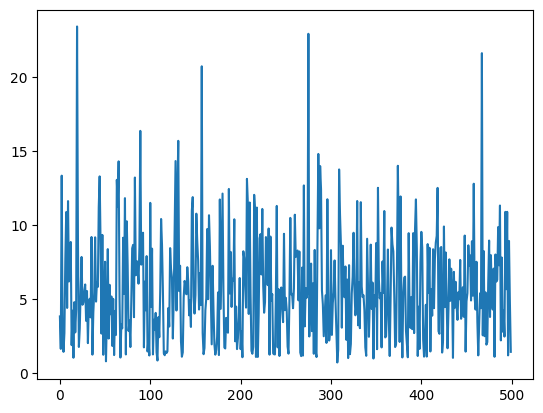

In [230]:
import matplotlib.pyplot as plt

plt.plot([loss.item() for loss in losses[-500:]])

In [231]:
print(torch.tensor(losses).mean())

tensor(5.7039)


In [ ]:
val = 